## Keras Tutorial: Training NN on MNIST

#### 1. Import libraries and modules

In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

#gpu = 4
#os.environ["CUDA_VISIBLE_DEVICES"]=str(gpu)

Using TensorFlow backend.


#### 2. Load pre-shuffled MNIST data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#f = np.load('/home/WX282231/DB/mnist.npz')
#x_train, y_train = f['x_train'], f['y_train']

#X_train, X_test, y_train, y_test = train_test_split(
#    x_train, y_train, test_size=0.1, random_state=42)
 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


#### 3. Preprocess input data

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#### 4. Preprocess class labels

In [4]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### 5. Generators example

In [5]:
from keras.utils import Sequence
from keras.models import model_from_json
from keras.models import load_model

In [6]:
class SequenceExample(Sequence):
    def __init__(self, data, labels, batch_size=1):
        self.data = data
        self.labels = labels
        self.batch_size = batch_size
        
    def __len__(self):
        return int(len(self.data) / self.batch_size)

    def __getitem__(self, i):
        data_batch = self.data[i*self.batch_size: (i+1)*self.batch_size]
        label_batch = self.labels[i*self.batch_size: (i+1)*self.batch_size]
        return data_batch, label_batch
        
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        print('on_epoch_end')
        

1875
(32, 28, 28, 1) (32, 10)


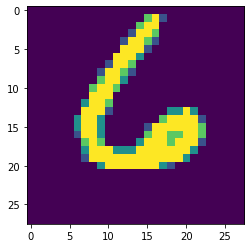

label is 6


In [7]:
train_generator = SequenceExample(X_train, Y_train, batch_size=32)
print(len(train_generator))

train_images, train_labels = train_generator[10]
print(train_images.shape, train_labels.shape)

index = 3
image = train_images[index, :, :, 0]
plt.imshow(image)
plt.show()

print('label is %d' % np.argmax(train_labels[index]))

312
(32, 28, 28, 1) (32, 10)


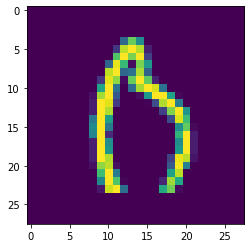

label is 0


In [8]:
test_generator = SequenceExample(X_test, Y_test, batch_size=32)
print(len(test_generator))
test_images, test_labels = test_generator[10]
print(test_images.shape, test_labels.shape)

index = 4
image = test_images[index, :, :, 0]
plt.imshow(image)
plt.show()

print('label is %d' % np.argmax(test_labels[index]))

#### 5. Define model architecture

In [9]:
model = Sequential()
 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### 6. Compile model

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Callbacks (https://keras.io/callbacks/)

#### ModelCheckpoint

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
callbacks_list = []

In [13]:
checkpoints_directory = 'checkpoints'
if not os.path.exists(checkpoints_directory):
    os.makedirs(checkpoints_directory)
keras_model_name = 'keras_mnist'
model_name_template = "%s-{epoch:03d}.h5" % (keras_model_name)
filepath = os.path.join(checkpoints_directory, model_name_template )
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
callbacks_list.append(checkpoint)

#### EarlyStopping

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=0, mode='auto')

callbacks_list.append(early_stopping)

#### BaseLogger

#### TerminateOnNaN

#### ProgbarLogger

#### History

#### LearningRateScheduler

####  TensorBoard

#### ReduceLROnPlateau

#### CSVLogger

#### LambdaCallback

### 7. Fit model 

In [ ]:
model.fit_generator(train_generator, epochs=1000, verbose=1, callbacks=callbacks_list,
                    validation_data=test_generator, initial_epoch=10)


#### 8. Evaluate model on test data

In [ ]:
score = model.evaluate_generator(test_generator)

for result, metric_name in zip(score, model.metrics_names):
    print(metric_name, result)